<h1>Fashion MNIST</h1>

<h2>Setting Up Libraries</h2>

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [129]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [130]:
print('Training data:', X_train.shape, y_train.shape)
print('Test data:', X_test.shape, y_test.shape)

Training data: (60000, 28, 28) (60000,)
Test data: (10000, 28, 28) (10000,)


## Baseline Models

In [29]:
X = X_train.copy()
y = y_train.copy()

X_val = X_test.copy()
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1] * X_val.shape[2])
X_val.shape

(10000, 784)

In [30]:
X = X.reshape(X.shape[0], X.shape[1] * X.shape[2])
X.shape

(60000, 784)

<h3> Logistic Regression </h3>

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [9]:
lgr = LogisticRegression(max_iter = 800)
lgr.fit(X, y)
prediction = lgr.predict(X_val)
print(accuracy_score(prediction, y_test))

0.8363


C:\Users\PC\miniconda3\envs\cs_ftmle\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


<h3> Random Forest Classifier </h3>

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [208]:
forest = RandomForestClassifier()
forest.fit(X, y)
scores = cross_val_score(forest, X_val, y_test, cv = 5)
print(scores)

[0.851 0.836 0.85  0.85  0.841]


<p> Looks promising </p>

<h3> Naive Bayes </h3>

In [67]:
from sklearn.naive_bayes import GaussianNB

naive = GaussianNB()
naive.fit(X, y)
prediction = naive.predict(X_val)
print(accuracy_score(prediction, y_test))

0.5856


<p> Probably not... </p>

<h3> Light Gradient Boosting Machine</h3>

In [27]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [35]:
import lightgbm as lgb

lgb = lgb.LGBMClassifier()
lgb.fit(X, y)
prediction = lgb.predict(X_val)
print(accuracy_score(y_test, prediction))

0.8941


<h2> Pipeline </h2>

In [8]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

class preparation(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y = None):
        return self
    def transform(self, X):
        X = X.reshape(X.shape[0], X.shape[1] * X.shape[2]) / 255
        return X

<h3> Let's try PCA </h3>

In [9]:
from sklearn.decomposition import PCA

In [54]:
clf = Pipeline([('preparation', preparation()),
                ('pca', PCA(n_components = 300)),
               ('forest', RandomForestClassifier())])

In [44]:
prediction = pipeline.predict(X_test)
print(accuracy_score(prediction, y_test))

0.8518


<h2>Fine Tuning</h2>

In [10]:
def plot_images(images, labels):
    plt.figure(figsize=(20, 10))
    columns = 10
    for i, image in enumerate(images):
        ax = plt.subplot(len(images) / columns + 1, columns, i + 1)
        ax.set_title(f"{labels[i]}", fontsize=16)
        plt.axis('off')
        plt.subplots_adjust(bottom=0.1)
        plt.imshow(image, cmap='gray')

In [11]:
from sklearn.model_selection import RandomizedSearchCV
import random

<h3> Logistic Regression </h3>

In [10]:
log = Pipeline([('preparation', preparation()),
                ('pca', PCA(n_components = 300)),
               ('log', LogisticRegression(max_iter = 700))])

In [11]:
params = {'log__solver': ['lbfgs', 'sag', 'saga'],
         'log__C': list(np.arange(0.8, 1.0, 0.05))}

random_grid_logistic = RandomizedSearchCV(log, params, n_iter = 30, scoring = 'accuracy',
                                n_jobs = -1, verbose = 10, return_train_score = True)

random_grid_logistic.fit(X_train, y_train)

C:\Users\PC\miniconda3\envs\cs_ftmle\lib\site-packages\sklearn\model_selection\_search.py:282: UserWarning: The total space of parameters 12 is smaller than n_iter=30. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 16.4min
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed: 20.5min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 30.2min
[Parallel(n_jobs=-1)]: Done  44 out of  60 | elapsed: 34.3min remaining: 12.5min
[Parallel(n_jobs=-1)]: Done  51 out of  60 | elapsed: 42.0min remaining:  7.4min
[Parallel(n_jobs=-1)]: Done  58 out of  60 | elapsed: 51.3min remaining:  1.8min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 51.8min finished
C:\Users\PC\miniconda3\envs\cs_ftmle\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation f

RandomizedSearchCV(estimator=Pipeline(steps=[('preparation', preparation()),
                                             ('pca', PCA(n_components=300)),
                                             ('log',
                                              LogisticRegression(max_iter=700))]),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'log__C': [0.8, 0.8500000000000001,
                                                   0.9000000000000001,
                                                   0.9500000000000002],
                                        'log__solver': ['lbfgs', 'sag',
                                                        'saga']},
                   return_train_score=True, scoring='accuracy', verbose=10)

In [17]:
pd.DataFrame(random_grid_logistic.cv_results_).head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_log__solver,param_log__C,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,184.982770,1.018998,0.616510,0.036707,lbfgs,0.8,"{'log__solver': 'lbfgs', 'log__C': 0.8}",0.857917,0.851583,0.860500,...,0.857267,0.003096,4,0.870917,0.873708,0.871500,0.871125,0.870958,0.871642,0.001054
1,538.096092,43.794111,0.567458,0.027647,sag,0.8,"{'log__solver': 'sag', 'log__C': 0.8}",0.857583,0.851167,0.859833,...,0.857000,0.003012,7,0.870604,0.874167,0.871625,0.871500,0.871083,0.871796,0.001238
2,1083.814636,92.596299,0.649312,0.060103,saga,0.8,"{'log__solver': 'saga', 'log__C': 0.8}",0.855917,0.851667,0.860833,...,0.856833,0.003118,9,0.869875,0.873333,0.872125,0.870521,0.870833,0.871337,0.001238


In [21]:
random_grid_logistic.best_params_

{'log__solver': 'lbfgs', 'log__C': 0.8500000000000001}

In [22]:
log = Pipeline([('preparation', preparation()),
                ('pca', PCA(n_components = 300)),
               ('log', LogisticRegression(C = 0.85, max_iter = 1400))])
log.fit(X_train, y_train)
prediction = log.predict(X_test)
print(accuracy_score(y_test, prediction))

0.8446


In [115]:
log_model[log_model['Y_test'] != log_model['Prediction']]['Y_test'].value_counts()

6    434
2    272
4    246
0    184
3    127
5     78
8     61
9     59
7     54
1     39
Name: Y_test, dtype: int64

C:\Users\PC\miniconda3\envs\cs_ftmle\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  """


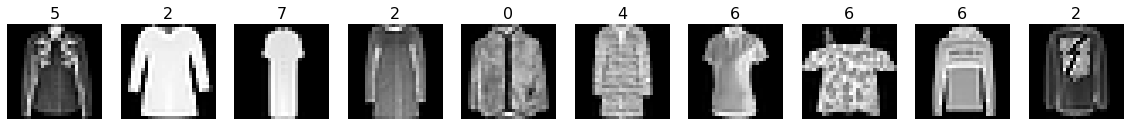

In [139]:
wrong_predictions = X_val[y_test != prediction ].reshape((-1, 28, 28))[20: 30]
predictions = prediction[y_test != prediction]

plot_images(wrong_predictions, predictions)

<h3> Random Forest </h3>

In [43]:
clf = Pipeline([('preparation', preparation()),
                ('pca', PCA()),
               ('forest', RandomForestClassifier(max_samples = 0.8))])

In [14]:
params = {'forest__n_estimators': list(np.arange(200, 500, 50)),
         'forest__max_depth': list(np.arange(10, 200, 10)),
         'forest__min_samples_split': [2, 5, 10],
         'forest__max_features': ['auto', 'sqrt', 'log2'],
         'forest__min_samples_leaf': [1, 2, 4, 6],
         'pca__n_components': list(np.arange(300, 400, 10))}

forest = RandomizedSearchCV(clf, params, n_iter = 30, random_state = 1, n_jobs = -1, verbose = 2)

In [15]:
forest.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 19.7min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 112.3min finished


RandomizedSearchCV(estimator=Pipeline(steps=[('preparation', preparation()),
                                             ('pca', PCA()),
                                             ('forest',
                                              RandomForestClassifier(max_samples=0.8))]),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'forest__max_depth': [10, 20, 30, 40,
                                                              50, 60, 70, 80,
                                                              90, 100, 110, 120,
                                                              130, 140, 150,
                                                              160, 170, 180,
                                                              190],
                                        'forest__max_features': ['auto', 'sqrt',
                                                                 'log2'],
                                        'forest__min_samples_

In [38]:
# random_forest_track = pd.DataFrame(forest.cv_results_).sort_values(by = 'mean_test_score', ascending = False)
# random_forest_track.to_csv('Forest Params Track.csv', index = False)

In [49]:
forest.best_params_

{'pca__n_components': 310,
 'forest__n_estimators': 450,
 'forest__min_samples_split': 5,
 'forest__min_samples_leaf': 1,
 'forest__max_features': 'auto',
 'forest__max_depth': 160}

In [48]:
random_forest = forest.best_estimator_
random_forest.fit(X_train, y_train)
prediction = random_forest.predict(X_test)
print(accuracy_score(y_test, prediction))

0.8553


<p>Even with optimizations, random forest only increased 0.1 in accuracy. We will now focus on Light Gradient Boosting Machine.</p>